### Apply the 'gettig started' Turorial to our dataset (aggregation by day)

In [2]:
import pandas as pd
from fbprophet import Prophet

In [11]:
df = pd.read_csv('../data/cleaned/dateseries_04_18.csv')
df.head(), df.tail()

(           ds   y
 0  2004-01-01  26
 1  2004-01-02  78
 2  2004-01-03  21
 3  2004-01-04  17
 4  2004-01-05  26,               ds   y
 5474  2018-12-27  25
 5475  2018-12-28  31
 5476  2018-12-29  18
 5477  2018-12-30  18
 5478  2018-12-31  40)

In [9]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [10]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
5839 2019-12-27
5840 2019-12-28
5841 2019-12-29
5842 2019-12-30
5843 2019-12-31

In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
5839 2019-12-27  32.776137   22.350213   43.830793
5840 2019-12-28  26.301597   15.367671   36.613802
5841 2019-12-29  18.981440    8.082387   29.929552
5842 2019-12-30  24.753138   13.294708   35.552929
5843 2019-12-31  27.340854   16.699807   37.963179

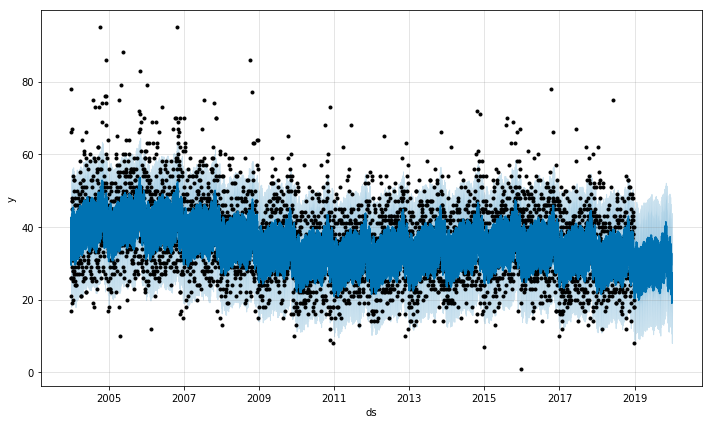

In [13]:
fig1 = m.plot(forecast)

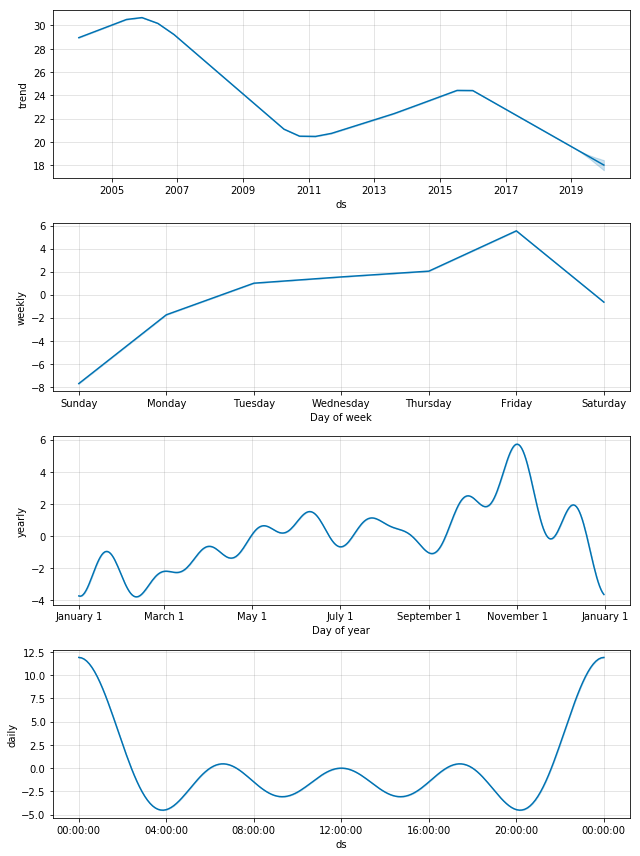

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)